In [1]:
#Import all needed libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set(font_scale=1.2)

from sklearn.metrics import roc_auc_score, accuracy_score


In [2]:
#Loading the dataset.  

loan_train = pd.read_csv('Train.csv') 
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_train.shape

(614, 13)

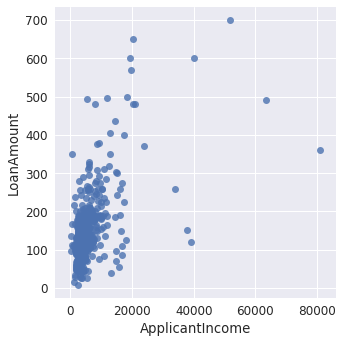

In [4]:
#Visualizing the data.

sns.lmplot('ApplicantIncome','LoanAmount', data=loan_train , fit_reg=False)

In [5]:
#Understanding the dataset.

loan_train.isnull().sum() #Number of NULL values in the dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
print(loan_train.shape)
print(loan_train.dropna().shape)

#Here we can see how many rows have null values which is almost 20%. 
#So we can't afford to drop those rows as it will affect the predictions.

(614, 13)
(480, 13)


In [7]:
loan_train.info() #Features that have null values can be inferred. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
#Describing features which have null value to understand each of them better.
print("GENDER :")
print(loan_train['Gender'].describe())
print("")

print("MARRIED :")
print(loan_train['Married'].describe())
print("")

print("DEPENDENTS :")
print(loan_train['Dependents'].describe())
print("")

print("SELF EMPLOYED :")
print(loan_train['Self_Employed'].describe())
print("")

print("LOAN AMOUNT :")
print(loan_train['LoanAmount'].describe())
print("")

print("LOAN AMOUNT TERM :")
print(loan_train['Loan_Amount_Term'].describe())
print("")

print("CREDIT HISTORY :")
print(loan_train['Credit_History'].describe())

GENDER :
count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

MARRIED :
count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

DEPENDENTS :
count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

SELF EMPLOYED :
count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

LOAN AMOUNT :
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

LOAN AMOUNT TERM :
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

CREDIT HISTORY :
count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000


In [9]:
#Processing missing values in categorical features with mode()   

#Gender
loan_train['Gender'].fillna(str(loan_train.Gender.mode()),inplace=True)

#Married
loan_train['Married'].fillna(str(loan_train.Married.mode()),inplace=True)

#Dependents
loan_train['Dependents'].fillna(str(loan_train.Dependents.mode()),inplace=True)

#Self Employed
loan_train['Self_Employed'].fillna(str(loan_train.Self_Employed.mode()),inplace=True)

In [10]:
print("TRAIN DATA SET SUMMARY : \n\n",loan_train.isnull().sum())

#Here we can see we only need to impute missing values for continuous value features : 
#Loan Amount , Loan_Amount_Term, Credit_History

TRAIN DATA SET SUMMARY : 

 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


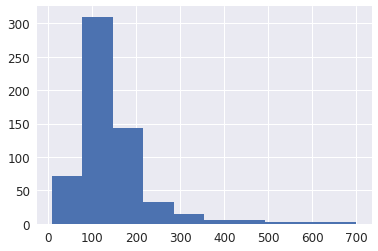

In [11]:
#Visualizing LoanAmount to understand it better on how to impute missing values

loan_train['LoanAmount'].hist()

In [12]:
#Here we can see that loan amount is right skewed , So imputing with Median would be better.

loan_train['LoanAmount'].fillna(loan_train.LoanAmount.median(),inplace=True)

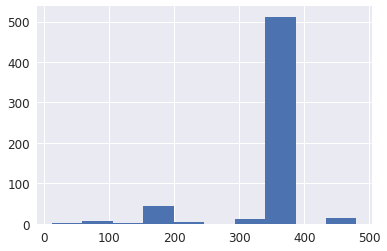

In [13]:
loan_train['Loan_Amount_Term'].hist()

In [14]:
#Here we can see that Loan_Amount_Term is left skewed , So imputing with Median would be better.

loan_train['Loan_Amount_Term'].fillna(loan_train.Loan_Amount_Term.median(),inplace=True)


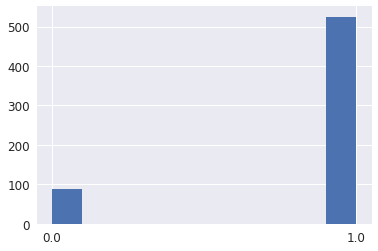

In [27]:
loan_train['Credit_History'].astype('str').hist() #Categorical Values

In [16]:
# Now since 'Credit_History' a categorical column hence imputing with mode value

loan_train['Credit_History'].fillna(loan_train.Credit_History.median(),inplace=True)


In [17]:
#Viewing if there is anymore missing values to impute 

print("TRAIN DATA SET SUMMARY : \n\n",loan_train.isnull().sum())


TRAIN DATA SET SUMMARY : 

 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [18]:
#Removing + sign from Dependents column

loan_train['Dependents'] = loan_train['Dependents'].str.replace("+","")

In [19]:
loan_train.head(10)

#DATA PREPROCESSING IS DONE!

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [20]:
#sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric 
#by encoding the categories

from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    loan_train[i] = le.fit_transform(loan_train[i])


In [21]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
loan_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,2,2,2,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,2,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,2,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,2,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,2,2,3,0,2,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,2,2,0,1,1,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,2,2,4,0,1,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,2,2,3,0,1,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,2,2,2,0,1,12841,10968.0,349.0,360.0,1.0,1,0


In [23]:
#Splitting the dataset
#Load library for model selection
from sklearn import model_selection


array = loan_train.values
X = array[:,6:11]
Y = array[:,12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)


In [24]:
x_train= x_train.astype('int')
x_test = x_test.astype('int')

In [25]:
y_train=y_train.astype('int')
y_test = y_test.astype('int')

In [26]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.837398373984
